In [1]:
%load_ext autoreload
%autoreload 2

The following cell plots the average time taken to validate a 
candidate password. You can see how better candidates
take more time to validate:

0000000000 - 679.5
0100000000 - 714.5
0120000000 - 797.5
0123000000 - 867.5
0123400000 - 954.0
0123450000 - 1048.0
0123456000 - 1089.5
0123456700 - 1178.0
0123456780 - 1260.0
0123456789 - 1185.5


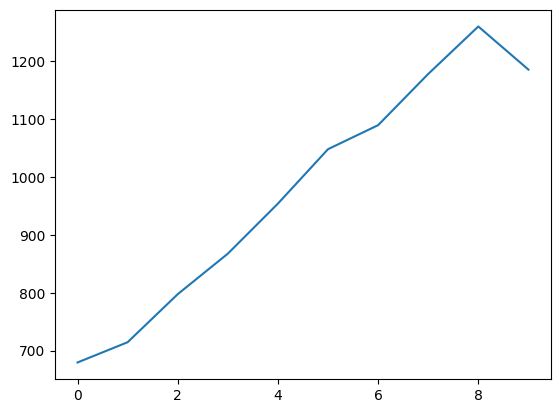

In [39]:
import time

from matplotlib import pyplot as plt

from auth import validate

import statistics

candidates = [
    "0000000000",
    "0100000000",
    "0120000000",
    "0123000000",
    "0123400000",
    "0123450000",
    "0123456000",
    "0123456700",
    "0123456780",
    "0123456789",
]

nanoseconds = [0 for _ in range(len(candidates))]

for i, candidate in enumerate(candidates):
    iterations = 10
    results = []
    for j in range(iterations):
        start = time.time_ns()
        validate(candidate)
        end = time.time_ns()
        results.append(end - start)
    nanoseconds[i] = statistics.median(results)
    print(f"{candidate} - {nanoseconds[i]}")

plt.plot(nanoseconds)

The following cell runs a Brute Force Algorithm to try all possible passwords against the weak password
validation function:

In [44]:
from bf import main

args = {
    "NUMBER_ITERATIONS": 0,
    "BRAKE_ON_SOLUTION": True,
}

%time main(args=args)

Solution = 0123456789
CPU times: user 1min 28s, sys: 0 ns, total: 1min 28s
Wall time: 1min 28s


The following cell runs a Genetic Algorithm to 
execute a timing attack on the weak password 
validation function:

Initial Population

Member 5907977324 Fitness 550.0
Member 4733733406 Fitness 487.5
Member 9984492149 Fitness 486.0
Member 7325395088 Fitness 484.5
Member 2713120902 Fitness 485.5
Member 9697067945 Fitness 490.5
Member 3322742834 Fitness 471.0
Member 8549971899 Fitness 480.0
Member 4230429464 Fitness 469.5
Member 6819616862 Fitness 416.5
Member 9367625190 Fitness 412.5
Member 2175488491 Fitness 416.5
Member 9617400268 Fitness 419.5
Member 8102348730 Fitness 420.0
Member 9825634787 Fitness 419.0
Member 5703468382 Fitness 419.5
Member 0694631703 Fitness 490.5
Member 2896013869 Fitness 414.0
Member 1694155278 Fitness 418.5
Member 3447529347 Fitness 418.5
Member 6700165119 Fitness 418.0
Member 5194666309 Fitness 421.5
Member 8338349511 Fitness 415.5
Member 2033032545 Fitness 418.5
Member 8974484480 Fitness 418.0
Member 0263620206 Fitness 492.5
Member 8649584903 Fitness 417.5
Member 0493141883 Fitness 488.0
Member 8412616651 Fitness 417.5
Member 3020425347 Fitness 416.5
Member 7955785370 Fi

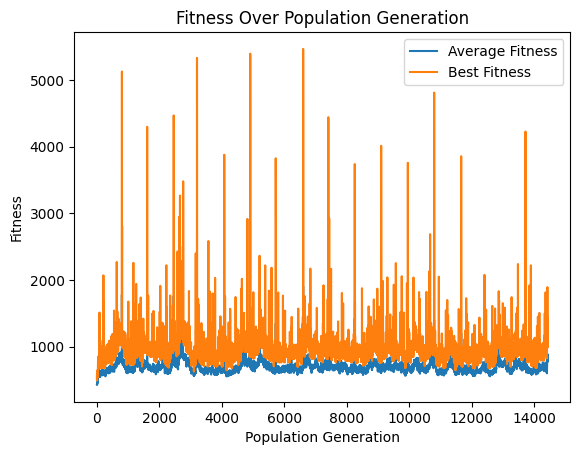

CPU times: user 36 s, sys: 189 ms, total: 36.2 s
Wall time: 36 s


In [43]:
from ga import main

args = {
    "POPULATION_SIZE": 100,
    "NUMBER_ITERATIONS": 60000,
    "MUTATION_PCT": 0.5,
    "BRAKE_ON_SOLUTION": True,
    "OUTPUT": "ga",
}

%time main(args=args)